In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, pearsonr, linregress
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

from dms_3d_features.plotting import plot_pop_avg_from_row, publication_style_ax, plot_motif_boxplot_stripplot


In [152]:
def plot_violinplot_w_percent(df: pd.DataFrame, x: str, y: str, cutoff=-5.65, color="tab:blue", gt_lt="greater", ax=None) -> plt.Axes:
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    sns.violinplot(x=x, y=y, data=df, color=color, density_norm='width', ax=ax)
    ax.axvline(cutoff, color='red', linestyle='--')
    count = 0
    for group_name, g in df.groupby(y):
        if gt_lt == "greater":
            percent = (g[x] > cutoff).sum() / len(g)
        elif gt_lt == "less":
            percent = (g[x] < cutoff).sum() / len(g)
        ax.text(-8.5, count, f"{percent:.2f}", va='center', ha='right')
        print(group_name, percent)
        count += 1
    return ax

In [102]:
DATA_PATH = "../data"

In [103]:
df_constructs = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1_combined.json")
df_constructs_nomod = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_nomod.json")
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])
df['ln_r_data'].replace(-np.inf, -9.8, inplace=True)
df_residue_avg = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues_avg.json")
df_residue_avg = df_residue_avg.query("r_type == 'WC'").copy()
df_wc = df.query("r_type == 'WC'").copy()

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [104]:
df_wc.sort_values("ln_r_data", inplace=True, ascending=False)
df_wc_high = df_wc.query("ln_r_data > -5.45").copy()
df_wc_high.sort_values("ln_r_data", inplace=True, ascending=False)


In [105]:
first_10_unique = df_wc_high.drop_duplicates(subset='m_sequence', keep='first').head(50)
first_10_unique["m_sequence"].values   

array(['AAUG&CCAU', 'AGGC&GAAU', 'AAAG&CCGU', 'AAUC&GCAU', 'CGAA&UCAG',
       'CAAA&UCAG', 'AAUA&UCAU', 'AAUA&UUGU', 'AACG&CCAU', 'GACA&UUAC',
       'UCAA&UGAA', 'AACU&ACCU', 'CGA&UAG', 'AAUG&CUGU', 'AGAA&UCAU',
       'AACA&UCAU', 'GUGA&UAUC', 'GGGA&UAAC', 'CCGA&UAAG', 'AUGA&UAUU',
       'UAUGUAG&UGAAA', 'AAGA&UGAU', 'GCCA&UACC', 'GCAA&UACC',
       'AACC&GCAU', 'CCAA&UAAG', 'UAUA&UUGA', 'AAAG&CCAU', 'UAAA&UCAA',
       'CGGA&UAAG', 'CCGUG&CG', 'ACAUG&CU', 'CGUC&GUAG', 'CGCA&UUGG',
       'CUAA&UACG', 'UAAG&CA', 'UACA&UUAA', 'CUGA&UAUG', 'AUAG&CACU',
       'UAC&GA', 'AAAA&UCAU', 'AACU&AUAU', 'AUGA&UACU', 'CAGA&UGAG',
       'GCAA&UAAC', 'UAAA&UGGA', 'CUCA&UACG', 'CUAA&UCCG', 'GACCC&GC',
       'UAAG&CAA'], dtype=object)

In [106]:
df_residue_avg.sort_values("r_data", inplace=True, ascending=False)

In [107]:
first_10_unique = df_residue_avg.drop_duplicates(subset='m_sequence', keep='first').head(50)


### all 

/var/folders/wj/4ksnmwbd59g7774kql3ctq7h0000gq/T/ipykernel_69108/3788250419.py:1: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, x="ln_r_data", y="r_nuc", scale="width");


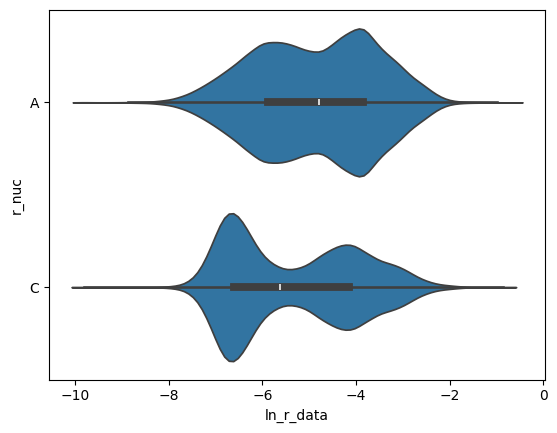

In [108]:
sns.violinplot(data=df, x="ln_r_data", y="r_nuc", scale="width");

/var/folders/wj/4ksnmwbd59g7774kql3ctq7h0000gq/T/ipykernel_69108/12699417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_wc, x="ln_r_data", y="r_nuc", density_norm='width', palette=["tab:red", "tab:blue"], ax=ax);


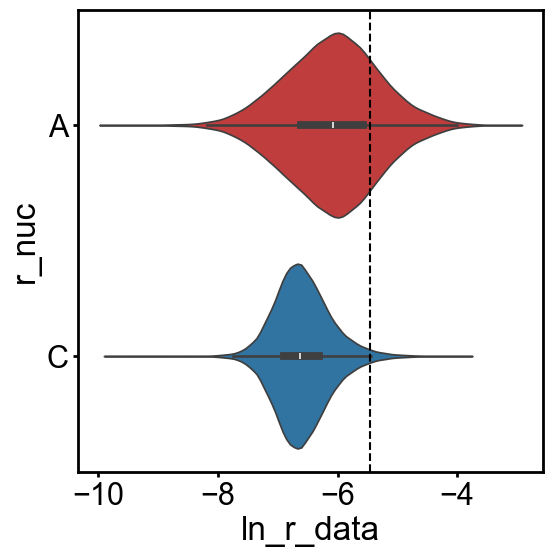

In [109]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.violinplot(data=df_wc, x="ln_r_data", y="r_nuc", density_norm='width', palette=["tab:red", "tab:blue"], ax=ax);
ax.axvline(-5.45, color="black", linestyle="--")
publication_style_ax(ax)

/var/folders/wj/4ksnmwbd59g7774kql3ctq7h0000gq/T/ipykernel_69108/2742918417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_wc_pdb, x="ln_r_data", y="r_nuc", density_norm='width', palette=["tab:red", "tab:blue"], ax=ax);


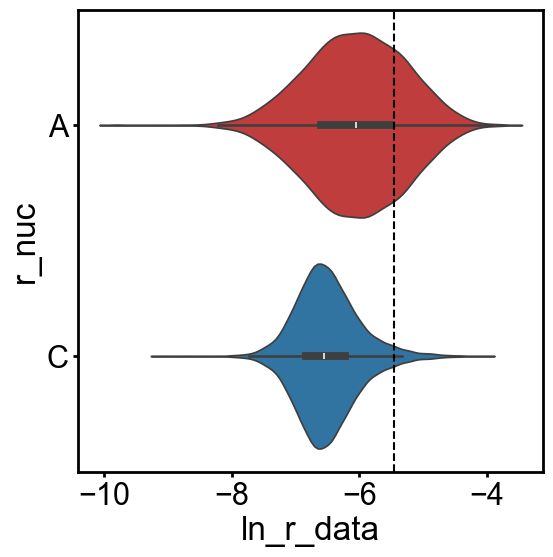

In [110]:
df_wc_pdb = df_wc.query("has_pdbs == True").copy()
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.violinplot(data=df_wc_pdb, x="ln_r_data", y="r_nuc", density_norm='width', palette=["tab:red", "tab:blue"], ax=ax);
ax.axvline(-5.45, color="black", linestyle="--")
publication_style_ax(ax)

### by m_token

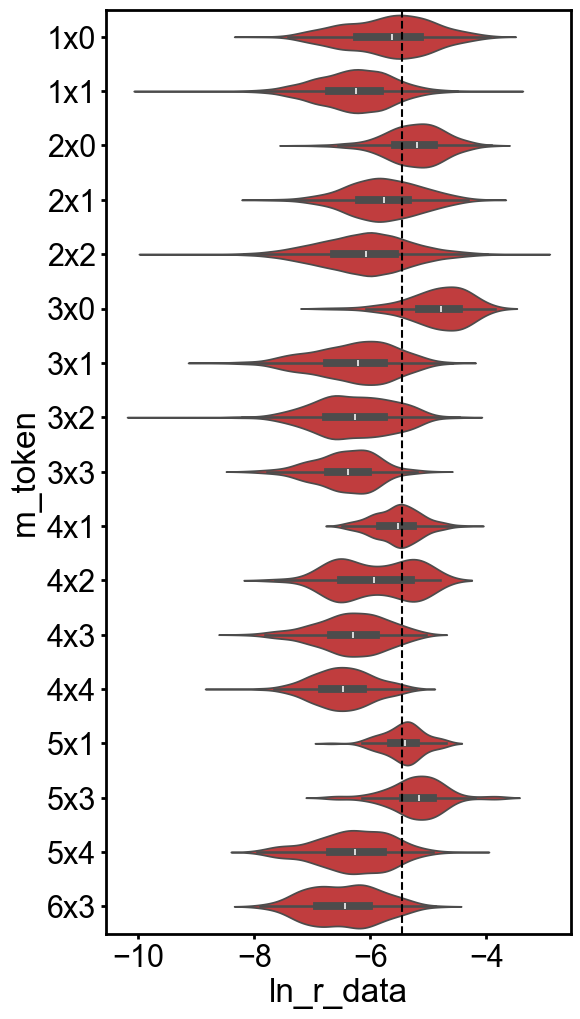

In [111]:
df_pos = df_wc.query("r_nuc == 'A'").copy()
df_pos.sort_values("m_token", inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(6, 12))
ax = sns.violinplot(data=df_pos, x="ln_r_data", y="m_token", density_norm='width', color='tab:red');
ax.axvline(-5.45, color="black", linestyle="--")
publication_style_ax(ax)


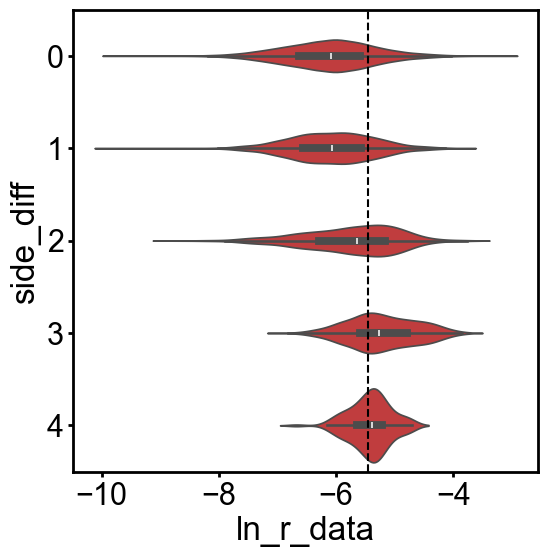

In [112]:
df_pos = df_wc.query("r_nuc == 'A' and m_token != '6x3'").copy()
df_pos["side_diff"] = [abs(int(x.split("x")[0]) - int(x.split("x")[1])) for x in df_pos["m_token"]]
df_pos["side_diff"] = df_pos["side_diff"].astype(str)
df_pos.sort_values("side_diff", inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.violinplot(data=df_pos, x="ln_r_data", y="side_diff", color='tab:red', ax=ax);
ax.axvline(-5.45, color="black", linestyle="--")
publication_style_ax(ax)



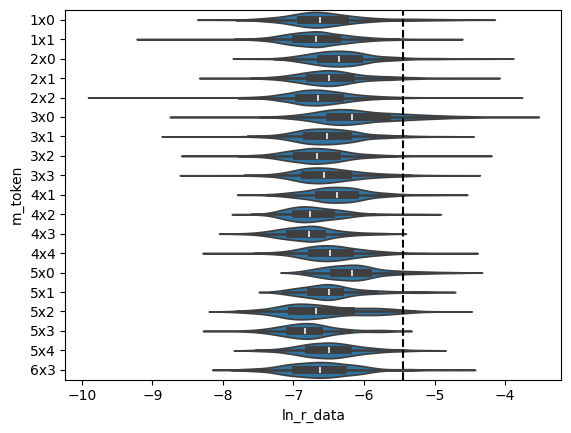

In [113]:
df_pos = df_wc.query("r_nuc == 'C'").copy()
df_pos.sort_values("m_token", inplace=True, ascending=True)
ax = sns.violinplot(data=df_pos, x="ln_r_data", y="m_token", density_norm='width');
ax.axvline(-5.45, color="black", linestyle="--")


### position 1 analysis

In [114]:
df_pos = df_wc.query("r_loc_pos == 0").copy()
stack = []
for i, row in df_pos.iterrows():
    stack.append(row["m_second_flank_bp_5p"][0] + row["p3_res"])
df_pos["stack"] = stack

In [115]:
for stack, g in df_pos.query("r_nuc == 'A'").groupby("stack"):
    g_sub = g.query("ln_r_data > -5.45")
    print(stack, len(g_sub) / len(g) * 100)

AA 22.08
AC 9.627547434996487
AG 10.262828535669586
AU 5.321683876092136
CA 25.69832402234637
CC 8.993399339933994
CG 11.573236889692586
CU 5.385329619312906
GA 28.647925033467203
GC 13.205907906168548
GG 18.70748299319728
GU 6.388888888888888
UA 14.273504273504273
UC 4.209390178089585
UG 4.7568710359408035
UU 0.9773976786805132


In [116]:
df_final = df_pos.query("r_nuc == 'A'").copy().sort_values("stack", ascending=True)
df_final['ln_r_data_bins'] = pd.cut(df_final['ln_r_data'], bins=25)

In [117]:
heatmap_data = df_final.pivot_table(index="stack", columns="ln_r_data_bins", values="ln_r_data", aggfunc="count")

<Axes: xlabel='ln_r_data_bins', ylabel='stack'>

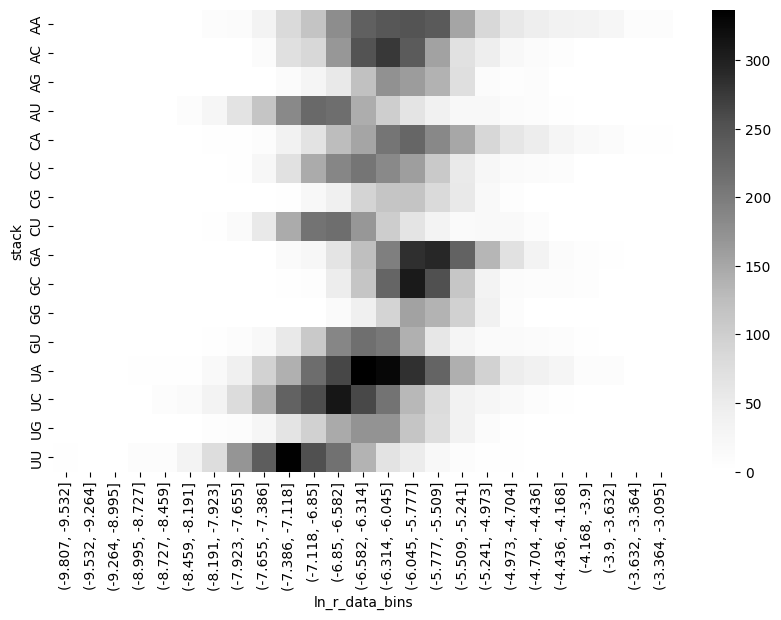

In [118]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Greys")

In [119]:
for stack, g in df_pos.query("r_nuc == 'C'").groupby("stack"):
    g_sub = g.query("ln_r_data > -5.45")
    print(stack, len(g_sub) / len(g) * 100)

AA 2.792022792022792
AC 6.225374310480693
AG 2.091633466135458
AU 0.48115477145148355
CA 0.23364485981308408
CC 0.4618937644341801
CG 0.48426150121065376
CU 0.0
GA 0.831353919239905
GC 2.2606382978723407
GG 1.2853470437017995
GU 0.26702269692923897
UA 0.8944543828264758
UC 2.3455824863174355
UG 1.1494252873563218
UU 0.5604483586869495


/var/folders/wj/4ksnmwbd59g7774kql3ctq7h0000gq/T/ipykernel_69108/1403191068.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data=df_target, x="ln_r_data", y="stack", scale="width")


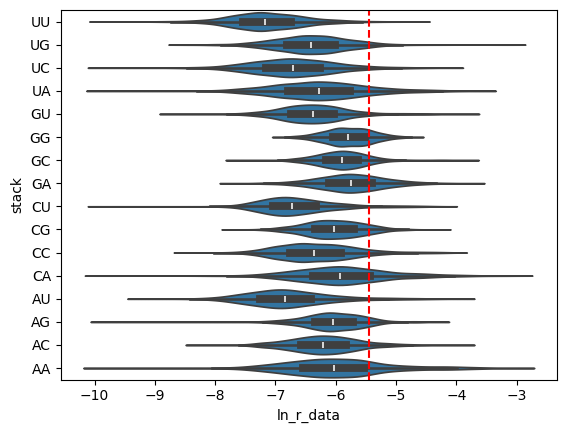

In [120]:
df_target = df_pos.query("r_nuc == 'A'").sort_values("stack", ascending=False)
ax = sns.violinplot(data=df_target, x="ln_r_data", y="stack", scale="width")
ax.axvline(-5.45, color="red", linestyle="--")

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_features/plotting.py:372: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


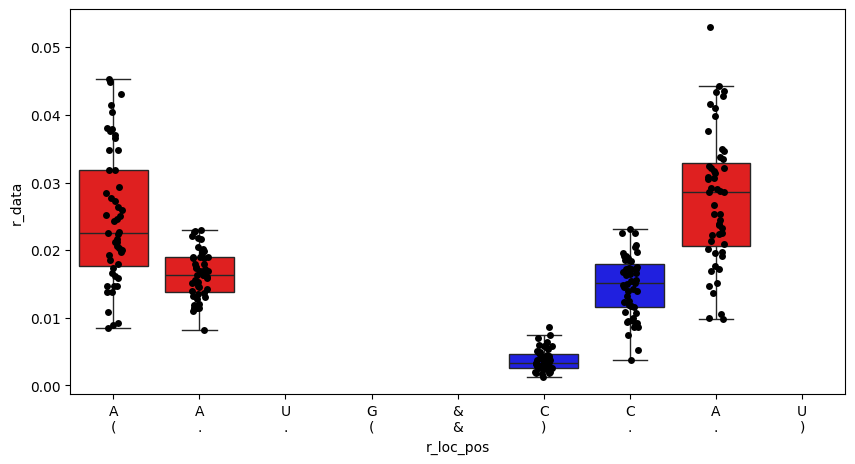

In [121]:
for m_sequence in first_10_unique["m_sequence"].values:
    plot_motif_boxplot_stripplot(df.query("m_sequence == @m_sequence"));
    break

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_features/plotting.py:372: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


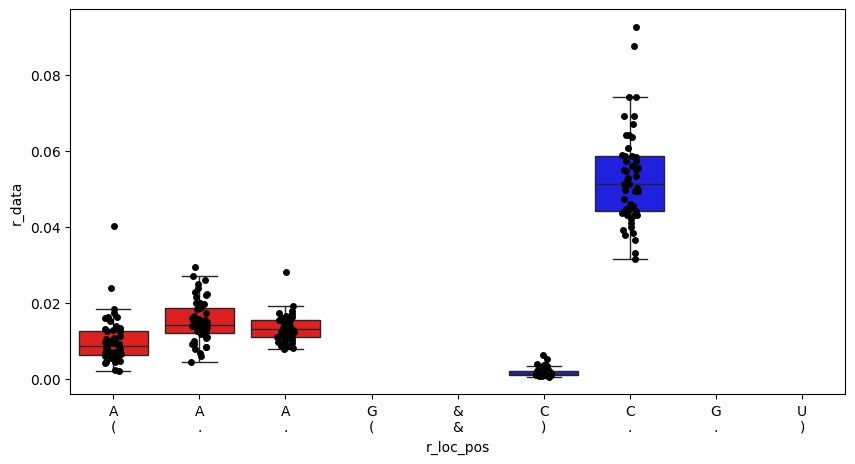

In [122]:
plot_motif_boxplot_stripplot(df.query("m_sequence == 'AAAG&CCGU'"));

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_features/plotting.py:372: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


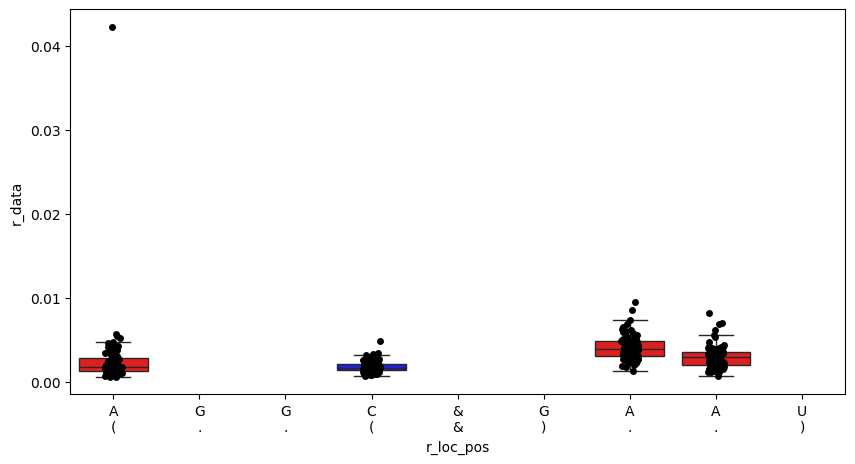

In [123]:
plot_motif_boxplot_stripplot(df.query("m_sequence == 'AGGC&GAAU'"));

#### AGGC&GAAU

In [124]:
df_wc.query("m_sequence == 'AGGC&GAAU' and r_loc_pos == 0 and ln_r_data > -5.45")

,both_purine,both_pyrimidine,constructs,has_pdbs,likely_pair,m_flank_bp_5p,m_flank_bp_3p,m_orientation,m_pos,m_second_flank_bp_5p,...,p3_type,r_data,r_nuc,r_loc_pos,r_pos,r_type,r_basepair_type,r_pdb_nuc_pair,pdb_path,ln_r_data
72605,False,False,construct1191,False,AU,AU,CG,flipped,1,UA,...,PURINE,0.04229,A,0,97,WC,None,None,[],-3.163205
72600,False,False,construct949,False,AU,AU,CG,flipped,0,GC,...,PURINE,0.00573,A,0,105,WC,None,None,[],-5.162040
72613,False,False,construct1911,False,AU,AU,CG,flipped,2,AU,...,PURINE,0.00553,A,0,92,WC,None,None,[],-5.197567
72635,False,False,construct3320,False,AU,AU,CG,flipped,3,GC,...,PURINE,0.00529,A,0,83,WC,None,None,[],-5.241937
72675,False,False,construct147,False,AU,AU,CG,flipped,3,GC,...,PURINE,0.00482,A,0,84,WC,None,None,[],-5.334981
72655,False,False,construct6826,False,AU,AU,CG,non-flipped,1,GC,...,PURINE,0.00466,A,0,13,WC,None,None,[],-5.368740
72633,False,False,construct3027,False,AU,AU,CG,flipped,5,GC,...,PURINE,0.00441,A,0,70,WC,None,None,[],-5.423881


<Axes: >

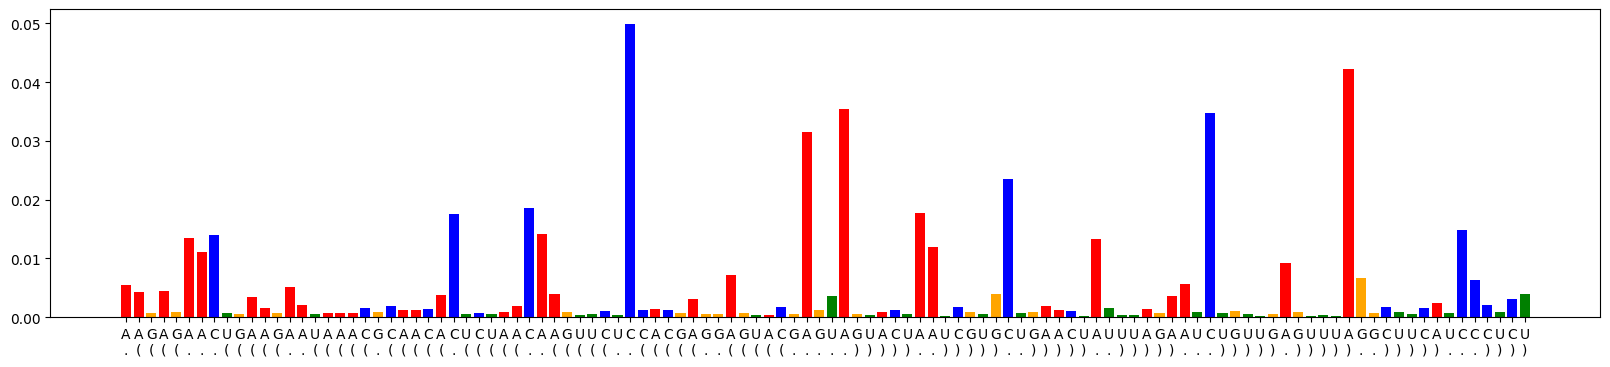

In [125]:
plot_pop_avg_from_row(df_constructs.query('name == "construct1191"').iloc[0])

<Axes: >

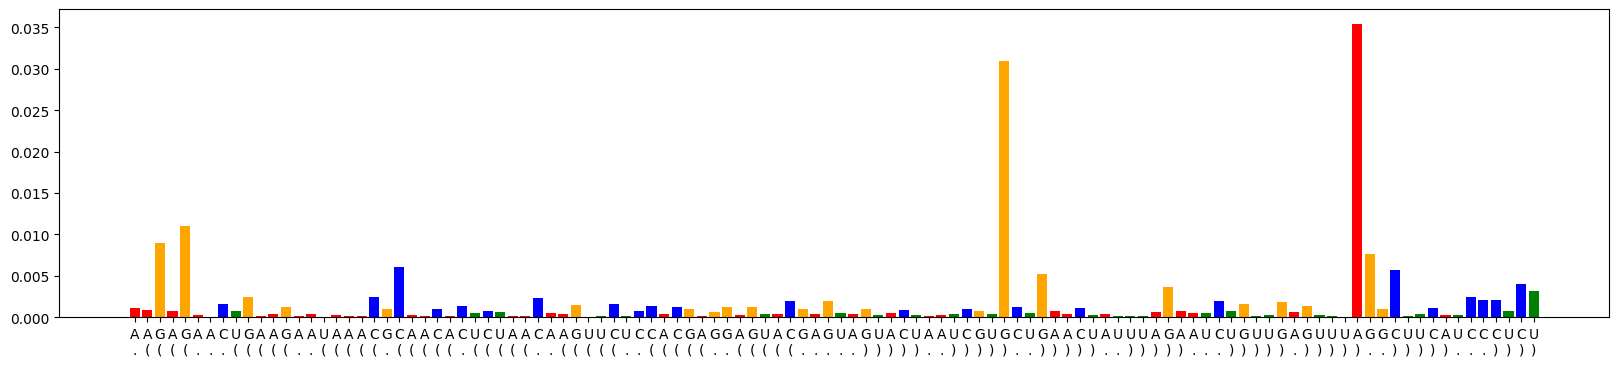

In [126]:
plot_pop_avg_from_row(df_constructs_nomod.query('name == "construct1191"').iloc[0])

In [127]:
df_constructs.query('name == "construct1191"').iloc[0]["sequence"]

'AAGAGAACUGAAGAAUAAACGCAACACUCUAACAAGUUCUCCACGAGGAGUACGAGUAGUACUAAUCGUGCUGAACUAUUUAGAAUCUGUUGAGUUUAGGCUUCAUCCCUCU'

<Axes: >

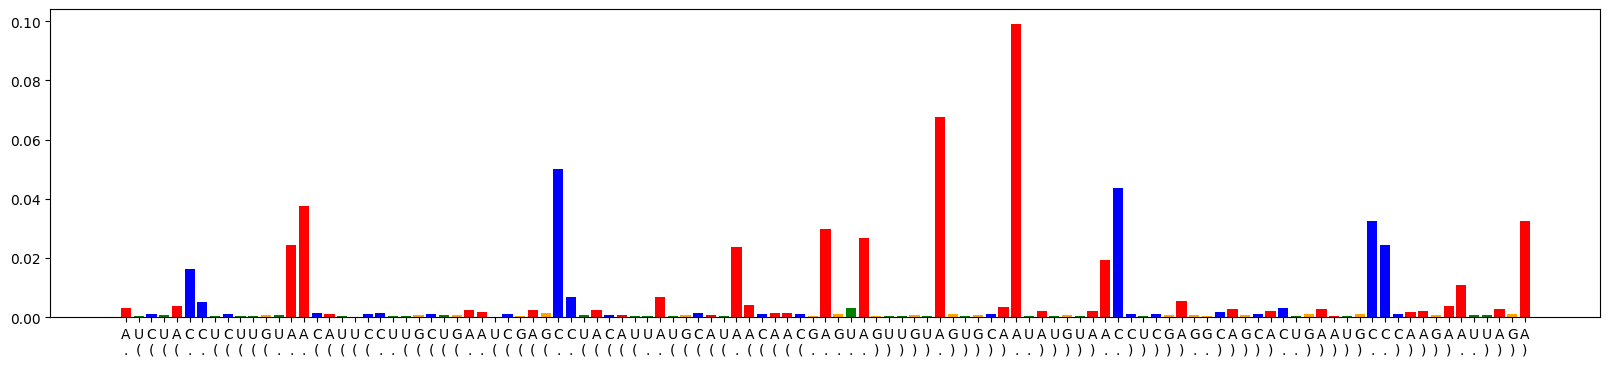

In [128]:
plot_pop_avg_from_row(df_constructs.query('name == "construct3320"').iloc[0])

<Axes: >

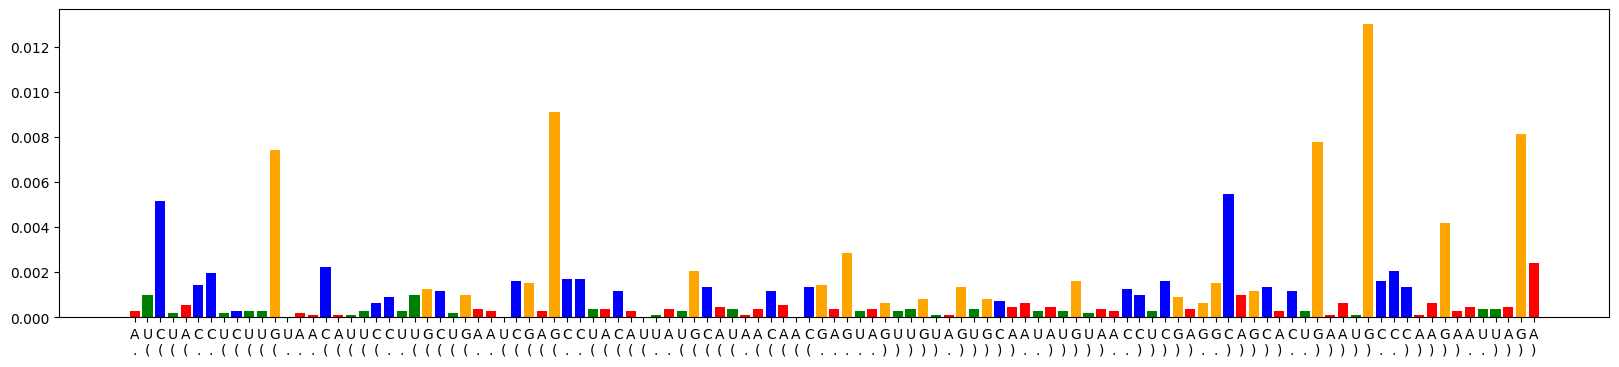

In [129]:
plot_pop_avg_from_row(df_constructs_nomod.query('name == "construct3320"').iloc[0])

In [130]:
df_pos = df_wc.query("m_sequence == 'AGGC&GAAU' and r_loc_pos == 0").copy()

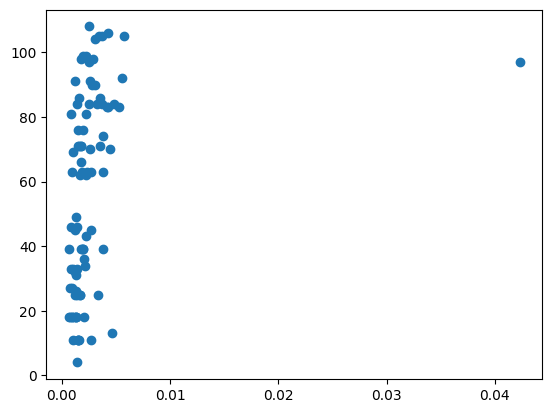

In [131]:
plt.scatter(df_pos["r_data"], df_pos["r_pos"])

<Axes: xlabel='r_data', ylabel='stack'>

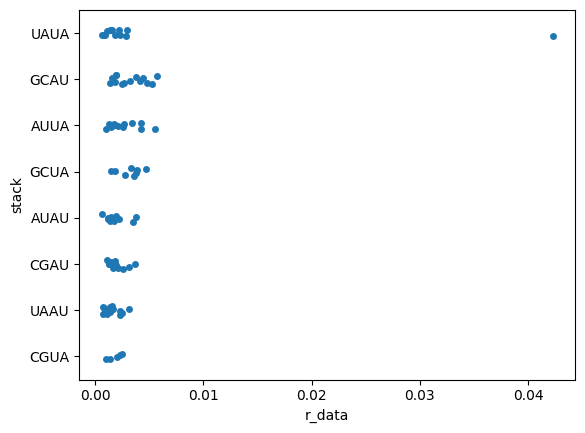

In [132]:
df_pos["stack"] = df_pos["m_second_flank_bp_5p"] + df_pos["m_second_flank_bp_3p"]
sns.stripplot(x="r_data", y="stack", data=df_pos, jitter=True)

#### AAAG&CCGU

In [133]:
df_wc.query("m_sequence == 'AAAG&CCGU' and r_loc_pos == 0 and ln_r_data < -5.45")

,both_purine,both_pyrimidine,constructs,has_pdbs,likely_pair,m_flank_bp_5p,m_flank_bp_3p,m_orientation,m_pos,m_second_flank_bp_5p,...,p3_type,r_data,r_nuc,r_loc_pos,r_pos,r_type,r_basepair_type,r_pdb_nuc_pair,pdb_path,ln_r_data
9115,False,False,construct5038,False,AU,AU,GC,flipped,2,UA,...,PURINE,0.00428,A,0,91,WC,None,None,[],-5.453802
9122,False,False,construct5499,False,AU,AU,GC,flipped,1,AU,...,PURINE,0.00419,A,0,98,WC,None,None,[],-5.475055
9098,False,False,construct2495,False,AU,AU,GC,flipped,5,GC,...,PURINE,0.00243,A,0,70,WC,None,None,[],-6.019864
9086,False,False,construct884,False,AU,AU,GC,flipped,2,UA,...,PURINE,0.00193,A,0,91,WC,None,None,[],-6.250235


(0.0, 0.05)

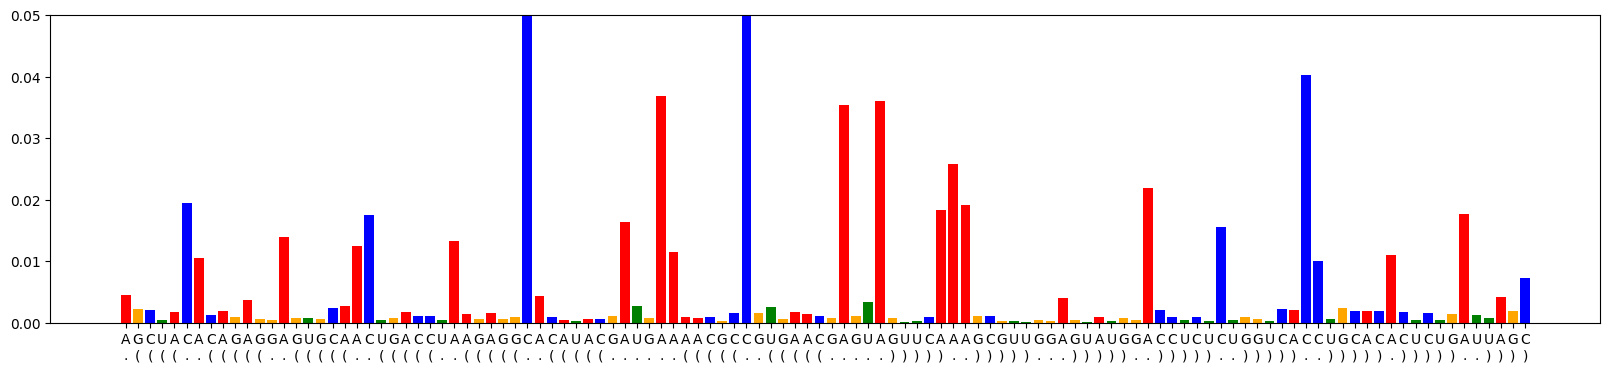

In [134]:
plot_pop_avg_from_row(df_constructs.query('name == "construct793"').iloc[0])
plt.ylim(0, 0.05)

<Axes: >

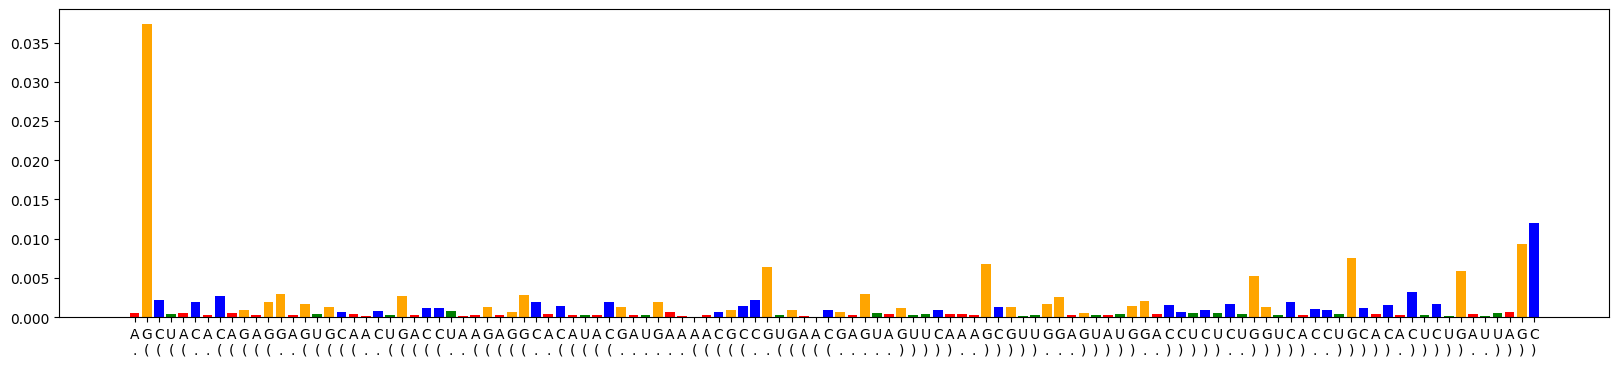

In [135]:
plot_pop_avg_from_row(df_constructs_nomod.query('name == "construct793"').iloc[0])

(0.0, 0.05)

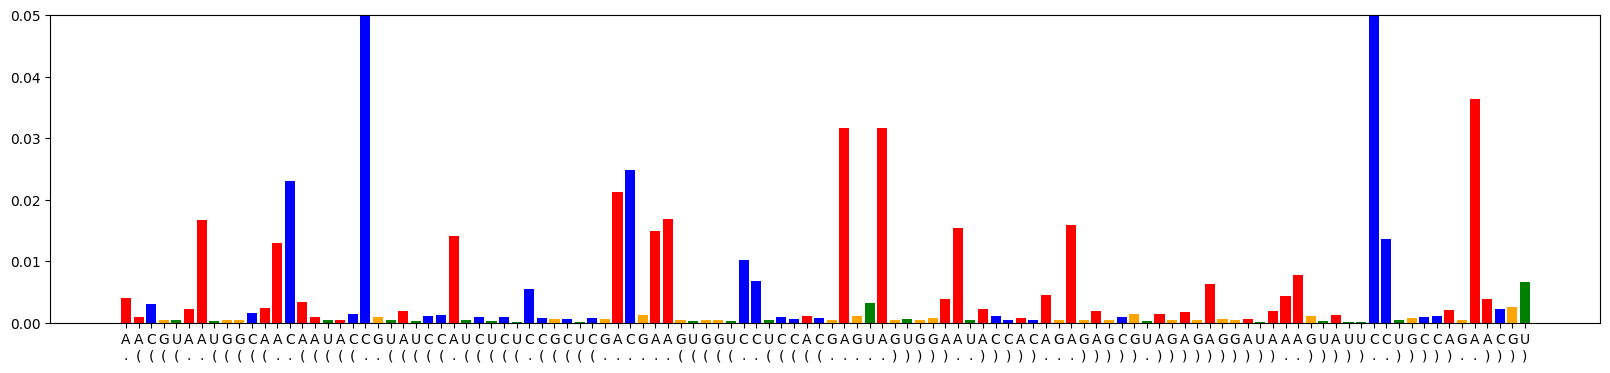

In [136]:
plot_pop_avg_from_row(df_constructs.query('name == "construct884"').iloc[0])
plt.ylim(0, 0.05)

<Axes: >

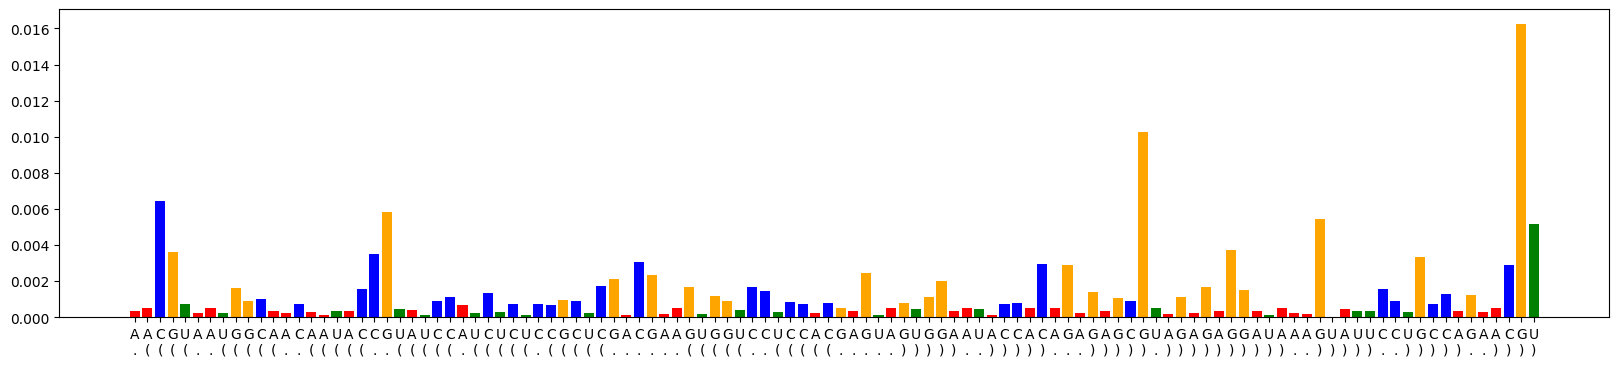

In [137]:
plot_pop_avg_from_row(df_constructs_nomod.query('name == "construct884"').iloc[0])

In [138]:
df_pos = df_wc.query("m_sequence == 'AAAG&CCGU' and r_loc_pos == 0").copy()

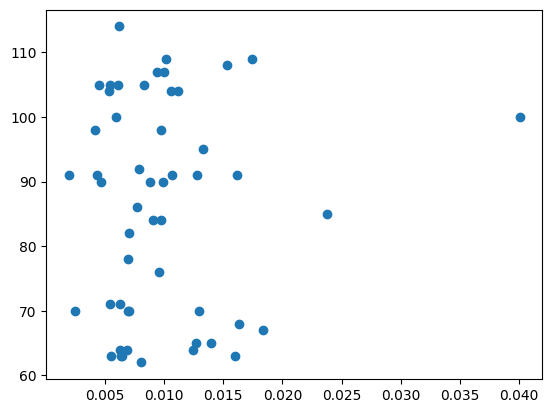

In [139]:
plt.scatter(df_pos["r_data"], df_pos["r_pos"])

<Axes: xlabel='r_data', ylabel='m_second_flank_bp_3p'>

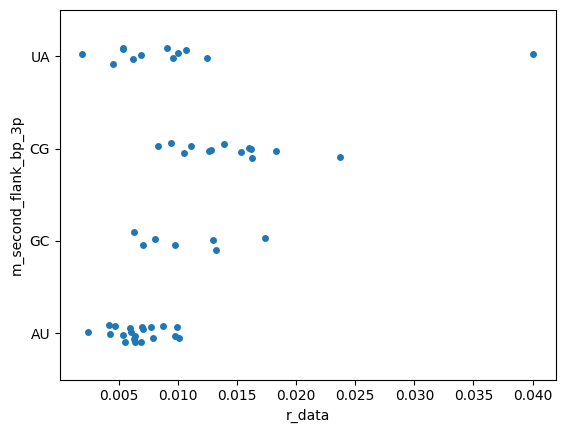

In [140]:
sns.stripplot(x="r_data", y="m_second_flank_bp_3p", data=df_pos, jitter=True)

<Axes: xlabel='r_data', ylabel='stack'>

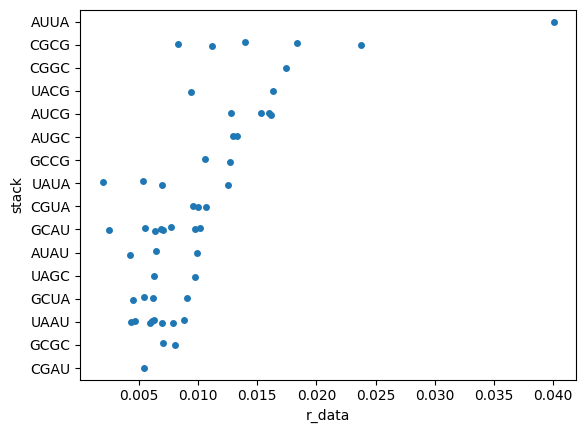

In [141]:
df_pos["stack"] = df_pos["m_second_flank_bp_5p"] + df_pos["m_second_flank_bp_3p"]
sns.stripplot(x="r_data", y="stack", data=df_pos, jitter=True)

### pdbs?

In [145]:
df_wc_pdb = df_wc.query("has_pdbs == True").copy()
df_wc_pdb.sort_values("ln_r_data", inplace=True, ascending=False)

In [147]:
df_wc_pdb.iloc[0]["pdb_path"]

['data/pdbs/GGGA_UAAC/TWOWAY.5O5J.2-2.UAAC-GGGA.0.pdb']

In [148]:
df_wc_pdb.iloc[1]["pdb_path"]

['data/pdbs/UAUGUAG_UGAAA/TWOWAY.6YS3.5-3.UAUGUAG-UGAAA.0.pdb']

In [151]:
df_wc_pdb.iloc[10]["pdb_path"]

['data/pdbs/GACCC_GC/TWOWAY.6NEQ.3-0.GACCC-GC.0.pdb']